# Data Processing for the FRB Simulations

Let's load in some FRB data and see what we can do with it:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

import numpy as np
import glob

datadir = "/Users/daniela/work/data/frbs/sims/"
outdir = "/Users/daniela/work/data/frbs/sims/"

file_basestring = "1000_Constant_SNR_"

cats = ["complex", "drifting", "simple_broad", "simple_narrow", "simulated_scattered"]

Function to plot dynamic spectra:

In [2]:
def plot_dynamic_spectra(dynamic_spectra, title="Dynamic Spectra"):
    """
    Plot a dynamic spectrum with horizontal time axis and reversed frequency axis.

    Parameters:
        dynamic_spectra (numpy.ndarray): The dynamic spectrum to plot.
        title (str): The title for the plot (default is "Dynamic Spectra").

    Returns:
        None
    """
    # Calculate the time step based on the number of time samples
    num_time_samples = dynamic_spectra.shape[0]
    time_step = 0.0000256  # Default time step in seconds

    # Calculate the extent based on the number of frequency channels
    extent = [0, num_time_samples * time_step * 1000, 1208, 1700]

    plt.figure(figsize=(10, 6))
    plt.imshow(dynamic_spectra.T, aspect="auto", cmap="viridis", extent=extent)
    plt.xlabel("Time (ms)", size=14)
    plt.ylabel("Frequency (MHz)", size=14)
    plt.colorbar()
    plt.title(title, size=16)
    plt.show()


Let's load in all bursts from a single category:

In [3]:

# empty dict for all burst data
bursts = {}

# start with first index
for i, c in enumerate(cats):
    # construct string for the correct directory
    cat_string = datadir + file_basestring + c + "/"
    
    # find all burst files
    burstfiles = glob.glob(cat_string  + "*")
    
    # load all bursts from this type of bursts:
    bdata_all = []
    for bf in burstfiles:
        bdata = np.load(bf)
        bdata_all.append(bdata)
    bdata_all = np.array(bdata_all)

    bursts[c] = bdata_all

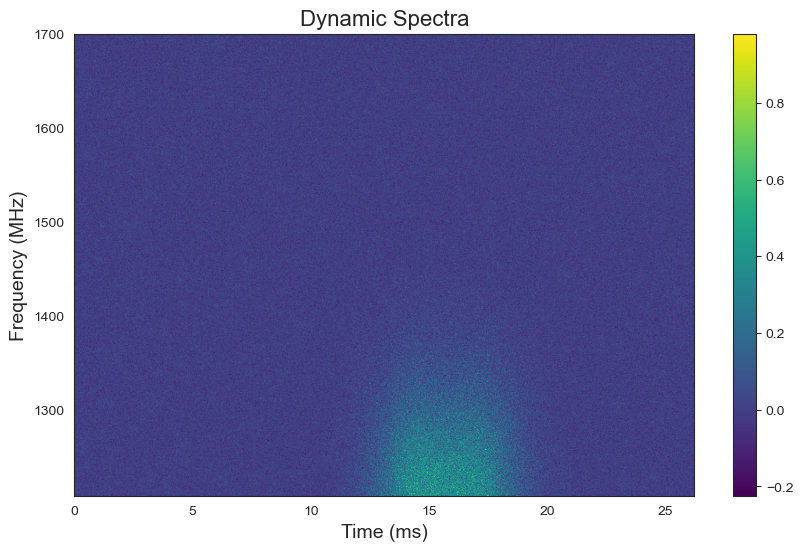

In [9]:
b = bursts["complex"][0]
plot_dynamic_spectra(b)

In [26]:
npixels = {}
frac_pixels = {}

# loop over categories
for c in cats:
    bclass = bursts[c]
    npx = np.zeros(len(bclass))
    fracpx = np.zeros_like(npx)
    for i,b in enumerate(bclass):
        ntotal = np.size(b)
        mb = np.mean(b[:100, :100])
        sb = np.std(b[:100, :100])

        mask = (b > 5*sb)
        n = np.sum(mask)
        npx[i] = n

        fp = n/ntotal
        fracpx[i] = fp

    npixels[c] = npx
    frac_pixels[c] = fracpx

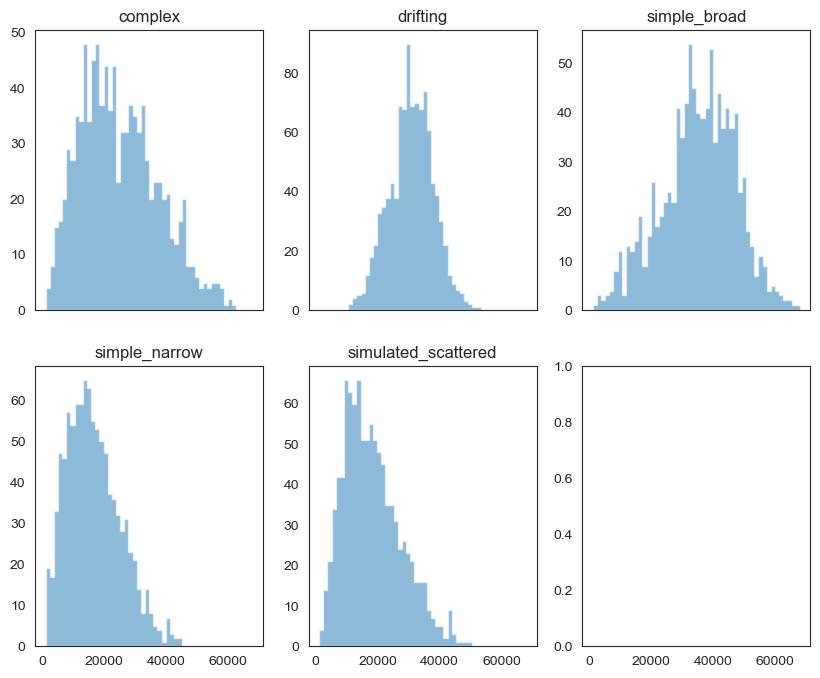

In [24]:
fig, axes = plt.subplots(2, 3, figsize= (10, 8), sharex=True)

axes = np.hstack(axes)

min_px = np.min([np.min(npixels[c]) for c in cats])
max_px = np.max([np.max(npixels[c]) for c in cats])

for i,c in enumerate(cats):
    axes[i].hist(npixels[c], bins=50, histtype="stepfilled", alpha=0.5, range=[min_px, max_px])
    axes[i].set_title(c)

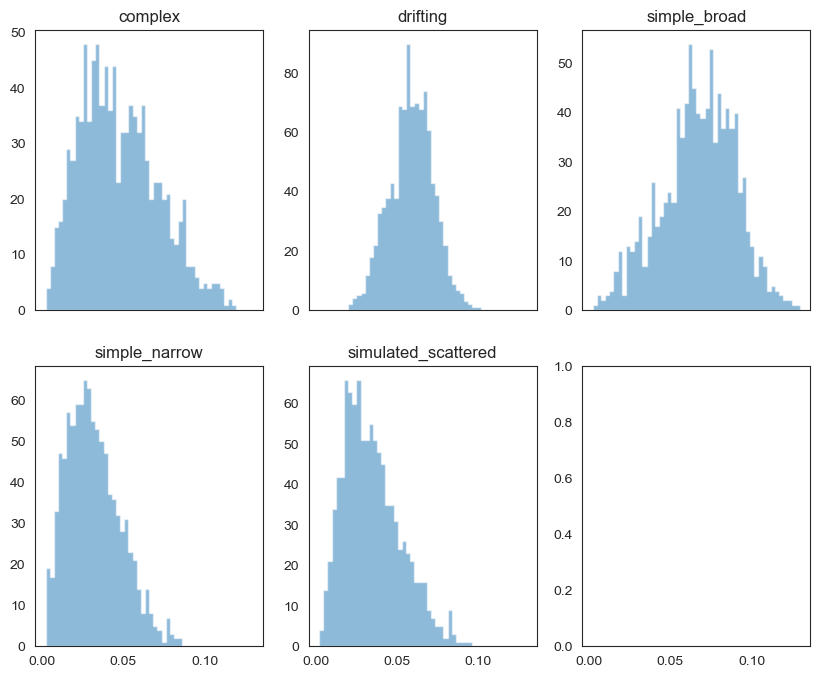

In [25]:
fig, axes = plt.subplots(2, 3, figsize= (10, 8), sharex=True)

axes = np.hstack(axes)

min_frac = np.min([np.min(frac_pixels[c]) for c in cats])
max_frac = np.max([np.max(frac_pixels[c]) for c in cats])

for i,c in enumerate(cats):
    axes[i].hist(frac_pixels[c], bins=50, histtype="stepfilled", alpha=0.5, range=[min_frac, max_frac])
    axes[i].set_title(c)

In [13]:
np.sum(mask)

40745

In [15]:
np.size(b)

524288

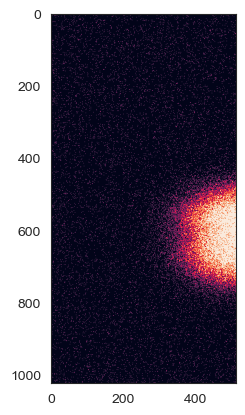

In [12]:
plt.figure()
plt.imshow(mask)

0.044422757

### Let's try TwoNN

In [28]:
from skdim.id import TwoNN

In [29]:
tnn = TwoNN()

In [35]:
bursts_narrow_flat = bursts["simple_narrow"].reshape(1000, 1024*512)

In [38]:
tnn.fit_pw(bursts_narrow_flat[:100])

KeyboardInterrupt: 